# Illustris Central Galaxies

This notebook seeks to understand properties of the central galaxies in Illustris.

Each subhalo is tagged by the Subfind algorithm as either a "central" or "satellite" galaxy. The first subhalo in each group is the central galaxy. In the API, this information is called "primary_flag".  Subhalo 0 for Illustris-3 snapshot 135 has primary_flag=1. This means that it is the central subhalo of the most massive group. On the other hand, subhalo 1 has primary_flag=0, because it is the first and most massive satellite in the group. This is how I determined the central galaxy in each snapshot.

In [3]:
import illustris_python as il
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import requests

baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key":"4e2c93455bbc8e991a91a61ef5e11daa"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [6]:
# These are the snapshots in which the central galaxy exists
snaps = range(25,134)

redshift = []

for s in snaps:
    snap_url = "http://www.illustris-project.org/api/Illustris-3/snapshots/"+str(s)+"/"
    snap = get(snap_url)
    redshift.append(snap['redshift'])

#print(redshift)

* "SubhaloMass" is the total mass of all member particle/cells which are bound to this Subhalo, of all types. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for.
* "SubhaloPos" is the spatial position within the periodic box (of the particle with the minium gravitational potential energy). Comoving coordinate.
* "SubhaloSFR" is the sum of the individual star formation rates of all gas cells in this subhalo.
* "SubhaloMassType" is the total mass of all member particle/cells which are bound to this Subhalo, separated by type. Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. Note: Wind phase cells are counted as gas (type 0) for SubhaloMassType.
* "SubhaloGasMetallicity" is the mass-weighted average metallicity (Mz/Mtot, where Z = any element above He) of the gas cells bound to this Subhalo, but restricted to cells within twice the stellar half mass radius.

In [7]:
subhalo_mass = []
subhalo_position = []
subhalo_sfr = []
subhalo_masstype = []
subhalo_metallicity = []

for s in snaps:
    snap_url = "http://www.illustris-project.org/api/Illustris-3/snapshots/"+str(s)+"/subhalos/0/info.json"
    snap = get(snap_url)
    subhalo_mass.append(snap['SubhaloMass'])
    subhalo_position.append(snap['SubhaloPos'])
    subhalo_sfr.append(snap['SubhaloSFR'])
    subhalo_masstype.append(snap['SubhaloMassType'])
    subhalo_metallicity.append(snap['SubhaloGasMetallicity'])
    
    
# print(subhalo_mass)
# print(subhalo_position)
# print(subhalo_sfr)
# print(subhalo_masstype)
# print(subhalo_metallicity)

In [8]:
print(len(subhalo_mass))
print(len(redshift))

109
109


In [9]:
gas_mass = []
stellar_mass = []

print(len(subhalo_masstype))
for m in range(0,len(subhalo_masstype)):
    gas_mass.append(subhalo_masstype[m][0])
    stellar_mass.append(subhalo_masstype[m][1])
    
#print(gas_mass)
#print(stellar_mass)

109


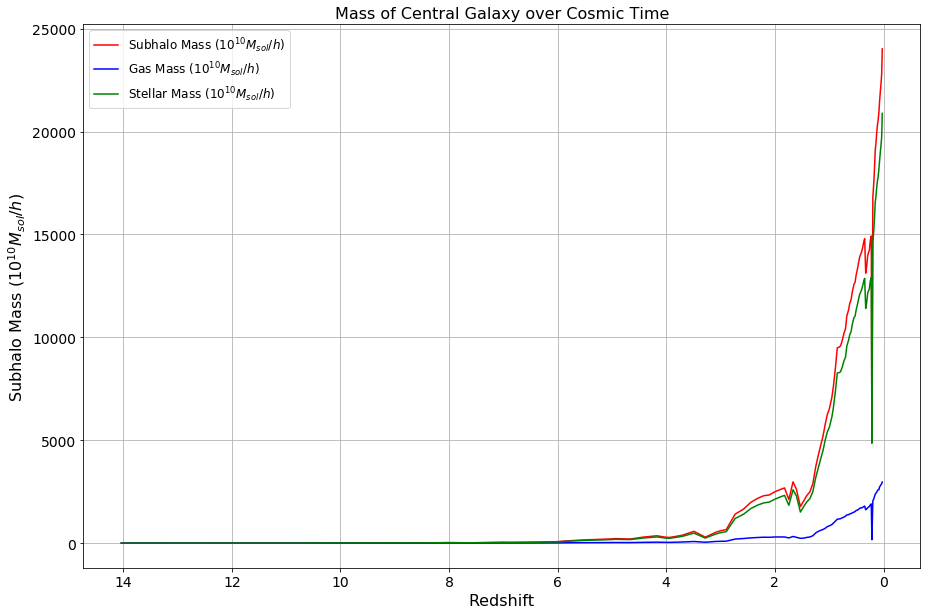

In [10]:
plt.figure(figsize=(15,10))
plt.plot(redshift,subhalo_mass,'r-',markersize=10, label="Subhalo Mass ($10^{10} M_{sol}/h$)")
plt.plot(redshift,gas_mass, 'b-',markersize=10, label="Gas Mass ($10^{10} M_{sol}/h$)")
plt.plot(redshift,stellar_mass, 'g-', markersize=10, label="Stellar Mass ($10^{10} M_{sol}/h$)")
plt.grid()
plt.gca().invert_xaxis()
plt.title("Mass of Central Galaxy over Cosmic Time", fontsize=16)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Subhalo Mass ($10^{10} M_{sol}/h$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 12})
plt.savefig("subhalomass_vs_redshift.png")

This plot shows how subhalo mass changes with time. As time goes on, subhalo mass increases which makes sense because of more interactions with gas and stars. Most of the mass is comprised of stars.

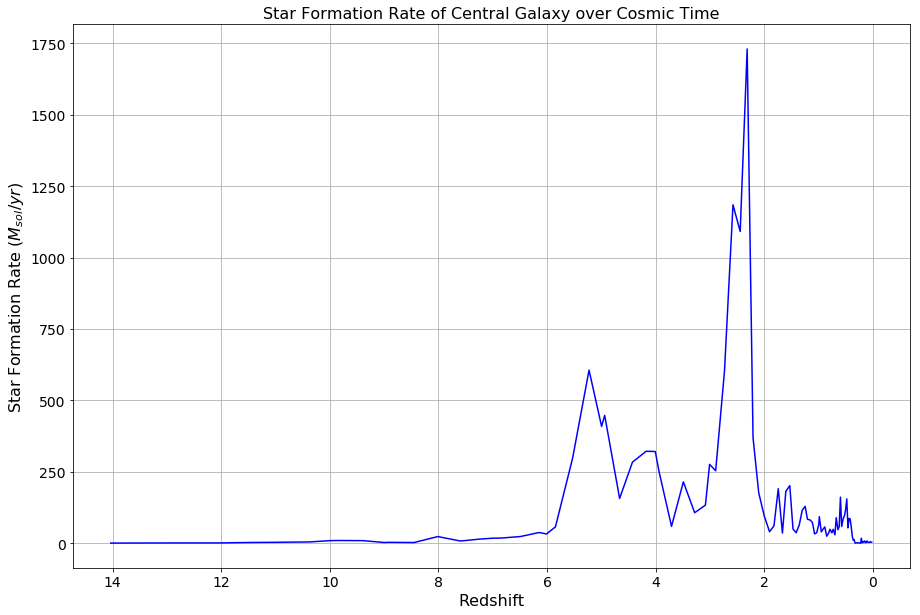

In [11]:
plt.figure(figsize=(15,10))
plt.plot(redshift,subhalo_sfr,'b-',markersize=10)
plt.grid()
plt.gca().invert_xaxis()
plt.title("Star Formation Rate of Central Galaxy over Cosmic Time", fontsize=16)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Star Formation Rate ($M_{sol}/yr$)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("sfr_vs_redshift.png")

This plot shows how star formation rate changes over time. There are two peaks in star formation rate around redshift 5 and redshift 2. However, at present day, the star formation rate has dwindled. The central galaxy is likely red and dead.

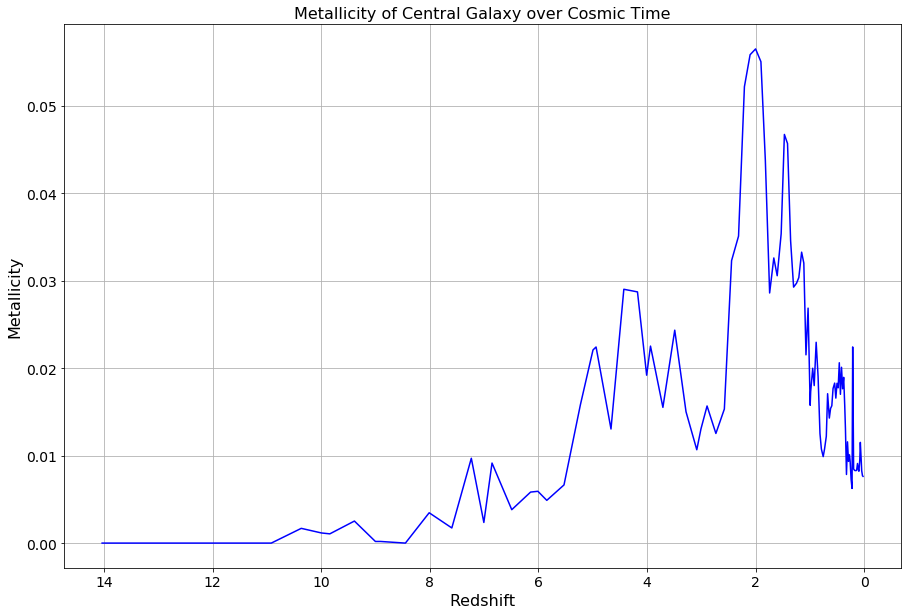

In [12]:
plt.figure(figsize=(15,10))
plt.plot(redshift,subhalo_metallicity,'b-',markersize=10)
plt.grid()
plt.gca().invert_xaxis()
plt.title("Metallicity of Central Galaxy over Cosmic Time", fontsize=16)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Metallicity',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("metallicity_vs_redshift.png")

This plot shows how metallicity changes over cosmic time. It has a similar shape to the star formation rate vs. redshift plot. This makes sense to me because more stars means more gas being created that is heavier than hydrogen and helium. The metallicity peaks at around redshift 4 and 2.

In [13]:
# Working with cutout for a single snapshot
f = h5py.File('/Users/sandyspicer/Desktop/Research_with_Moustakas/Test/Illustris-3/cutout_0_135.hdf5', 'r')

In [14]:
list(f)

['Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5']

In [16]:
list(f['PartType4'])

['Coordinates',
 'GFM_InitialMass',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_StellarFormationTime',
 'GFM_StellarPhotometrics',
 'Masses',
 'NumTracers',
 'ParticleIDs',
 'Potential',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities']

In [17]:
masses = list(f['PartType4']['Masses'])
initial_masses = list(f['PartType4']['GFM_InitialMass'])
time = list(f['PartType4']['GFM_StellarFormationTime'])

In [18]:
print(len(masses))
print(len(initial_masses))
print(len(time))

40669
40669
40669


In [19]:
# Calculate scale factor into redshift using formula z = (1/a) - 1

def a_to_z(t):
    z = (1/t) - 1
    return z
    

In [21]:
Redshift = []
for t in time:
    z = a_to_z(t)
    Redshift.append(z)

#print(Redshift)

In [22]:
print(initial_masses[0])
print(masses[0])

0.009180081
0.0049403613


In [23]:
converted_initial_masses = []
converted_masses = []

for m in initial_masses:
    converted_initial_masses.append(m*1e10*0.704)
    
for n in masses:
    converted_masses.append(n*1e10*0.704)
    
print(converted_initial_masses[0])
print(converted_masses[0])

64627770.78151702
34780143.201351166


In [24]:
stellar_mass_loss = []

stellar_mass_loss = [x1 - x2 for (x1, x2) in zip(converted_initial_masses, converted_masses)]

print(stellar_mass_loss[0])
print("The average stellar mass loss is:",np.mean(stellar_mass_loss),"solar masses")
print(converted_initial_masses[0])

29847627.580165856
The average stellar mass loss is: 22876995.54820352 solar masses
64627770.78151702


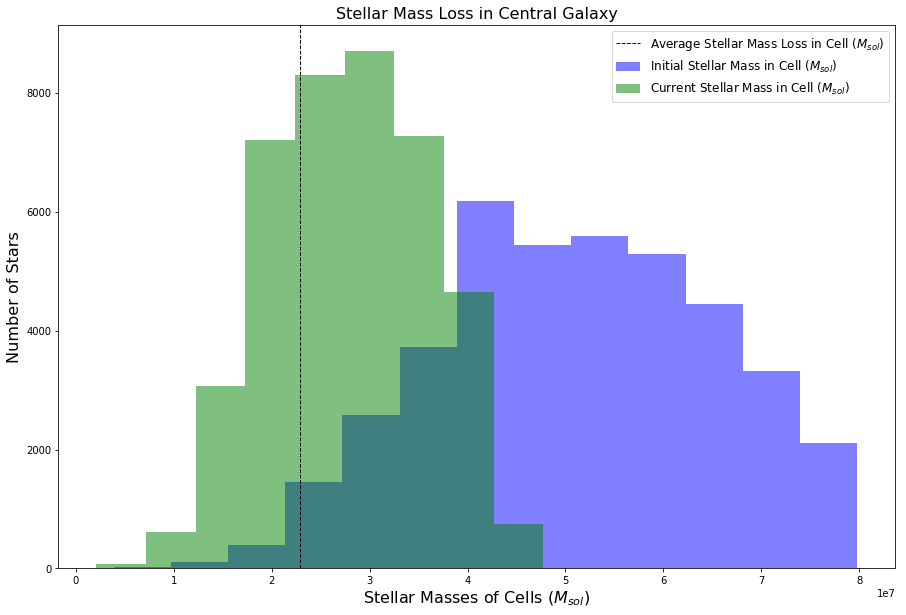

In [25]:
plt.figure(figsize=(15,10))
#plt.hist(stellar_mass_loss,color='red',bins=13,alpha = 0.5, label = 'Stellar Mass Loss ($M_{sol}$)')
plt.hist(converted_initial_masses, color='blue',bins=13,alpha = 0.5,label='Initial Stellar Mass in Cell ($M_{sol}$)')
plt.hist(converted_masses, color='green',bins=15,alpha = 0.5, label='Current Stellar Mass in Cell ($M_{sol}$) ')
plt.title("Stellar Mass Loss in Central Galaxy",fontsize = 16)
plt.axvline(x=22876995.54820352,linewidth=1, color='k', linestyle='--',label='Average Stellar Mass Loss in Cell ($M_{sol}$)')
plt.xlabel('Stellar Masses of Cells ($M_{sol}$)',fontsize=16)
plt.ylabel('Number of Stars',fontsize=16)
plt.legend(prop={'size': 12},bbox_to_anchor=(1, 1))
plt.savefig('stellar_mass_loss.png')

* The figure below shows a histogram of the stellar mass loss of stars in a given cell for the central galaxy at snapshot 135. 
* The blue histogram corresponds to the initial stellar mass of the cell. The green histogram corresponds to the current stellar mass of the cell. The black dashed line indicates the mean value of stellar mass loss between the two.
* The initial stellar mass values were obtained from the GFM_InitialMass field in the PartType4 (stars/wind particles) group. The units of GFM_InitialMass were originally in 10^10Msol/h so I converted them into solar masses. 
* Next, I took the field “Masses” from PartType4 which represents the current mass of the star/wind phase cell. This was also in the units of 10^10Msol/h so I converted them into solar masses to be consistent.
* To obtain the stellar mass loss, I subtracted each current mass value from the initial mass value.
* I chose to plot a histogram since you can see a clear drop in the mass. I plotted the vertical line in order to show the average stellar mass loss in the cell.

In [26]:
print("The average initial stellar mass is:",np.mean(converted_initial_masses),"solar masses")
print("The average stellar mass currently is:",np.mean(converted_masses),"solar masses")
print("The average stellar mass loss is:",np.mean(stellar_mass_loss),"solar masses")

The average initial stellar mass is: 50972883.57997521 solar masses
The average stellar mass currently is: 28095888.03177169 solar masses
The average stellar mass loss is: 22876995.54820352 solar masses
